<a href="https://colab.research.google.com/github/thisishasan/slda/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download a Heart Failure Clinical Records dataset; the dataset originally source from UC Irvine Machine Learning Repository [https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records]

In [645]:
!wget -nc 'https://raw.githubusercontent.com/thisishasan/slda/refs/heads/main/dataset.csv'

File ‘dataset.csv’ already there; not retrieving.



Import the necessary libraries

In [646]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from scipy.stats import (
    mannwhitneyu, ttest_ind, skew, kurtosis,
    shapiro, kstest, anderson, zscore, chi2_contingency,
    pearsonr, spearmanr, kendalltau
)

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    ConfusionMatrixDisplay, classification_report, roc_auc_score
)
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler


Read and load the dataset csv file into a data frame

In [647]:
file_path = os.path.join('dataset.csv')
df = pd.read_csv(file_path)

Displays the data frame information


In [648]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int64  
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  death_event               299 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 30.5 KB


In [649]:
data_dict = {
    "Feature": [
        "age", "anaemia", "creatinine phosphokinase (CPK)", "diabetes",
        "ejection fraction", "high blood pressure", "platelets",
        "sex", "serum creatinine", "serum sodium", "smoking", "time", "[target] death event"
    ],
    "Description": [
        "Age of the patient (years)",
        "Decrease of red blood cells or hemoglobin (boolean)",
        "Level of the CPK enzyme in the blood (mcg/L)",
        "If the patient has diabetes (boolean)",
        "Percentage of blood leaving the heart at each contraction (percentage)",
        "If the patient has hypertension (boolean)",
        "Platelets in the blood (kiloplatelets/mL)",
        "Woman or man (binary)",
        "Level of serum creatinine in the blood (mg/dL)",
        "Level of serum sodium in the blood (mEq/L)",
        "If the patient smokes or not (boolean)",
        "Follow-up period (days)",
        "If the patient died during the follow-up period (boolean)"
    ]
}

data_dict_df = pd.DataFrame(data_dict)
display(data_dict_df)


,Feature,Description
0,age,Age of the patient (years)
1,anaemia,Decrease of red blood cells or hemoglobin (boo...
2,creatinine phosphokinase (CPK),Level of the CPK enzyme in the blood (mcg/L)
3,diabetes,If the patient has diabetes (boolean)
4,ejection fraction,Percentage of blood leaving the heart at each ...
5,high blood pressure,If the patient has hypertension (boolean)
6,platelets,Platelets in the blood (kiloplatelets/mL)
7,sex,Woman or man (binary)
8,serum creatinine,Level of serum creatinine in the blood (mg/dL)
9,serum sodium,Level of serum sodium in the blood (mEq/L)


By default, displays the top five rows of the data frame


In [650]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Statistical Summary of the data frame

In [651]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.836120,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


Checks missing values in the data frame

In [652]:
df.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


Examining unique values

In [653]:
df.nunique()

,0
age,46
anaemia,2
creatinine_phosphokinase,208
diabetes,2
ejection_fraction,17
high_blood_pressure,2
platelets,176
serum_creatinine,40
serum_sodium,27
sex,2


Seperated numerical variables and categorical variables by determining the result of unique values with few unique values ​​as categorical variables and the variables with high unique values ​as numeric variables.

In [654]:
numerical_vars = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
categorical_vars = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'death_event']
target_vars = ['death_event']

We applied the "Describe" method to see the basic statistics of numerical data

In [655]:
df[numerical_vars].describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.836120,11.894809,40.0,51.0,60.0,70.0,95.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
time,299.0,130.260870,77.614208,4.0,73.0,115.0,203.0,285.0


Total counts of death events segregated by Yes or No

In [656]:
death_event_counts = df['death_event'].value_counts()
death_event_counts

,count
death_event,
0,203
1,96


Percentage of death events segregated by Yes or No

In [657]:
death_event_percentage = df['death_event'].value_counts(normalize=True) * 100
death_event_percentage_rounded = death_event_percentage.round(2)
death_event_percentage_rounded

,proportion
death_event,
0,67.89
1,32.11


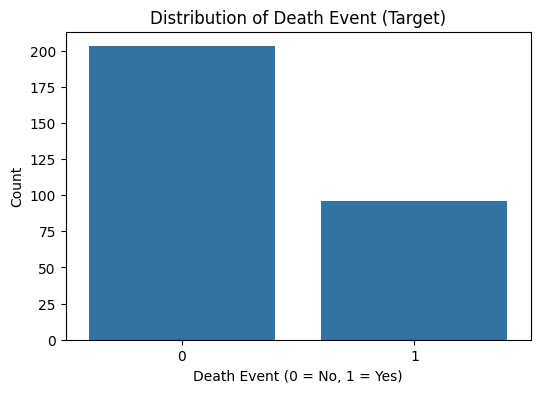

In [658]:
# Distribution of the target variable (death_event)
plt.figure(figsize=(6, 4))
sns.countplot(x='death_event', data=df)
plt.title("Distribution of Death Event (Target)")
plt.xlabel("Death Event (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

Visualization of Death Events

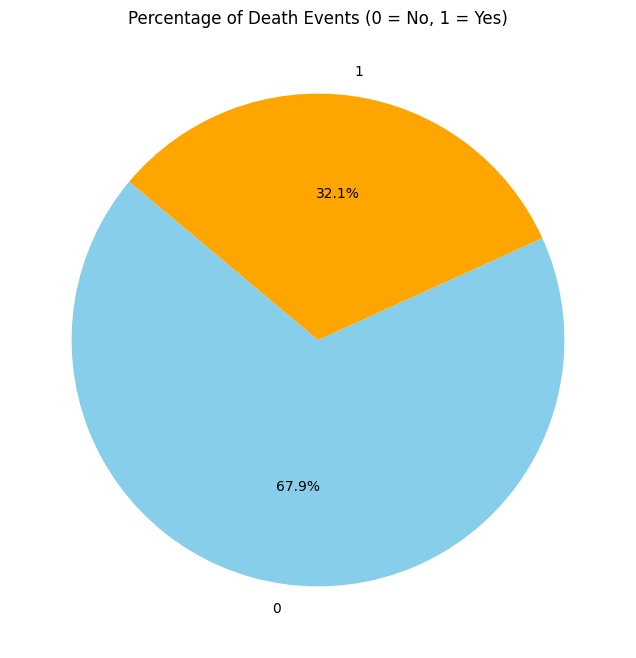

In [659]:
plt.figure(figsize=(8, 8))
death_event_percentage_rounded.plot.pie(autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange'])
plt.title('Percentage of Death Events (0 = No, 1 = Yes)')
plt.ylabel('')
plt.show()

In [660]:
filtered_df_by_deaths = df[df['death_event'] == 1]
filtered_df_by_deaths.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [661]:
filtered_df_by_not_deaths = df[df['death_event'] == 0]
filtered_df_by_not_deaths.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
14,49,1,80,0,30,1,427000.0,1.0,138,0,0,12,0
20,65,1,52,0,25,1,276000.0,1.3,137,0,0,16,0
23,53,0,63,1,60,0,368000.0,0.8,135,1,0,22,0
33,50,1,159,1,30,0,302000.0,1.2,138,0,0,29,0
38,60,0,2656,1,30,0,305000.0,2.3,137,1,0,30,0


## Univariate Analysis

Numerical Analysis



In [662]:
numerical_analysis = {}

for column in numerical_vars:
    data = df[column].dropna()
    skewness = data.skew()
    kurtois = data.kurt()
    numerical_analysis[column] = {
        "Mean": np.mean(data),
        "Median": np.median(data),
        "Mode": data.mode()[0] if not data.mode().empty else None,
        "Range": np.ptp(data),
        "Variance": np.var(data, ddof=1),
        "Standard Deviation": np.std(data, ddof=1),
        "Quantiles": np.percentile(data, [25, 50, 75]),
        "Skewness": skewness,
        "Kurtosis": kurtois,
        "Type of Kurtosis": "Leptokurtic (High)" if kurtois > 3 else "Platykurtic (Low)" if kurtois < 3 else "Mesokurtic (Normal)",
    }

numerical_analysis_df = pd.DataFrame(numerical_analysis)
display(numerical_analysis_df.T)

,Mean,Median,Mode,Range,Variance,Standard Deviation,Quantiles,Skewness,Kurtosis,Type of Kurtosis
age,60.83612,60.0,60,55,141.486476,11.894809,"[51.0, 60.0, 70.0]",0.422496,-0.185191,Platykurtic (Low)
creatinine_phosphokinase,581.839465,250.0,582,7838,941458.571457,970.287881,"[116.5, 250.0, 582.0]",4.46311,25.149046,Leptokurtic (High)
ejection_fraction,38.083612,38.0,35,66,140.063455,11.834841,"[30.0, 38.0, 45.0]",0.555383,0.041409,Platykurtic (Low)
platelets,263358.029264,262000.0,263358.03,824900.0,9565668749.448879,97804.236869,"[212500.0, 262000.0, 303500.0]",1.462321,6.209255,Leptokurtic (High)
serum_creatinine,1.39388,1.1,1.0,8.9,1.070211,1.03451,"[0.9, 1.1, 1.4]",4.455996,25.828239,Leptokurtic (High)
serum_sodium,136.625418,137.0,136,35,19.469956,4.412477,"[134.0, 137.0, 140.0]",-1.048136,4.119712,Leptokurtic (High)
time,130.26087,115.0,187,281,6023.965276,77.614208,"[73.0, 115.0, 203.0]",0.127803,-1.212048,Platykurtic (Low)


'age', 'ejection_fraction', 'time' have less extreme values due to low value of Kurtois (less than 3)

'creatinine_phosphokinase', 'platelets', 'time' have more frequent extreme values due to high value of Kurtois (greater than 3)



Outlier Detection using IQR

In [663]:
outlier_info = {}
for col in numerical_vars:
    Q1, Q3 = np.percentile(df[col], [25, 75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_info[col] = {
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outliers Count": len(outliers),
    }

outliers_df = pd.DataFrame(outlier_info)
display(outliers_df)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
Lower Bound,22.5,-581.75,7.5,76000.0,0.15,125.0,-122.0
Upper Bound,98.5,1280.25,67.5,440000.0,2.15,149.0,398.0
Outliers Count,0.0,29.00,2.0,21.0,29.00,4.0,0.0


* age: No outliers detected in age.
* creatinine_phosphokinase: 29 values above 1280.25 are outliers. The lower bound is negative, which is not possible for this variable, meaning only high values are outliers.
* ejection_fraction: 2 outliers exist, likely very low or very high ejection_fraction values.
* platelets: 2 outliers detected, either too low or too high platelet counts.
* serum_creatinine: 21 outliers detected, most likely high serum creatinine values above 2.15.
* serum_sodium: 4 outliers exist, possibly very low or very high sodium levels.
* time: The lower bound is negative, which is not possible for time. No outliers detected.

Visualization of Numerical Variables through Histogram

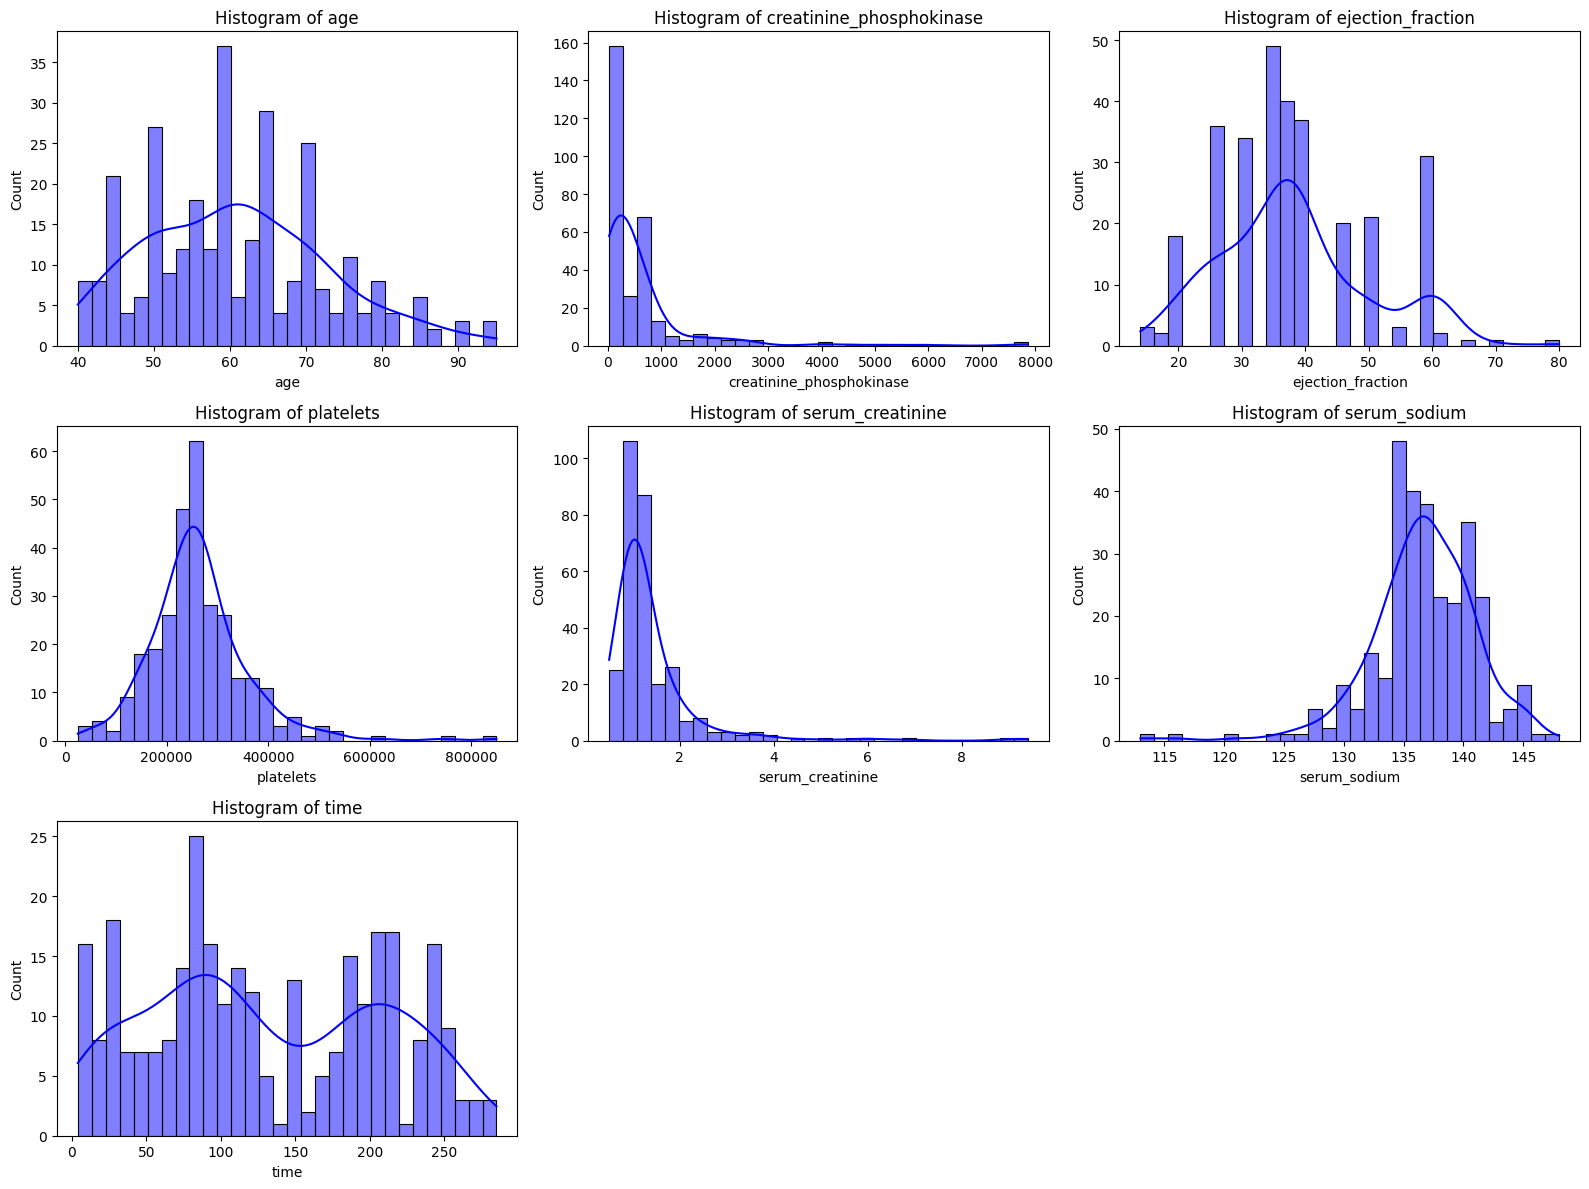

In [664]:
plt.figure(figsize=(16, 12))
for i, column in enumerate(numerical_vars, 1):
    # Updated subplot layout to accommodate all 7 numerical features (3 rows, 3 columns)
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f"Histogram of {column}")

plt.tight_layout()
plt.show()

Visualization of Numerical Variables through Box Plot

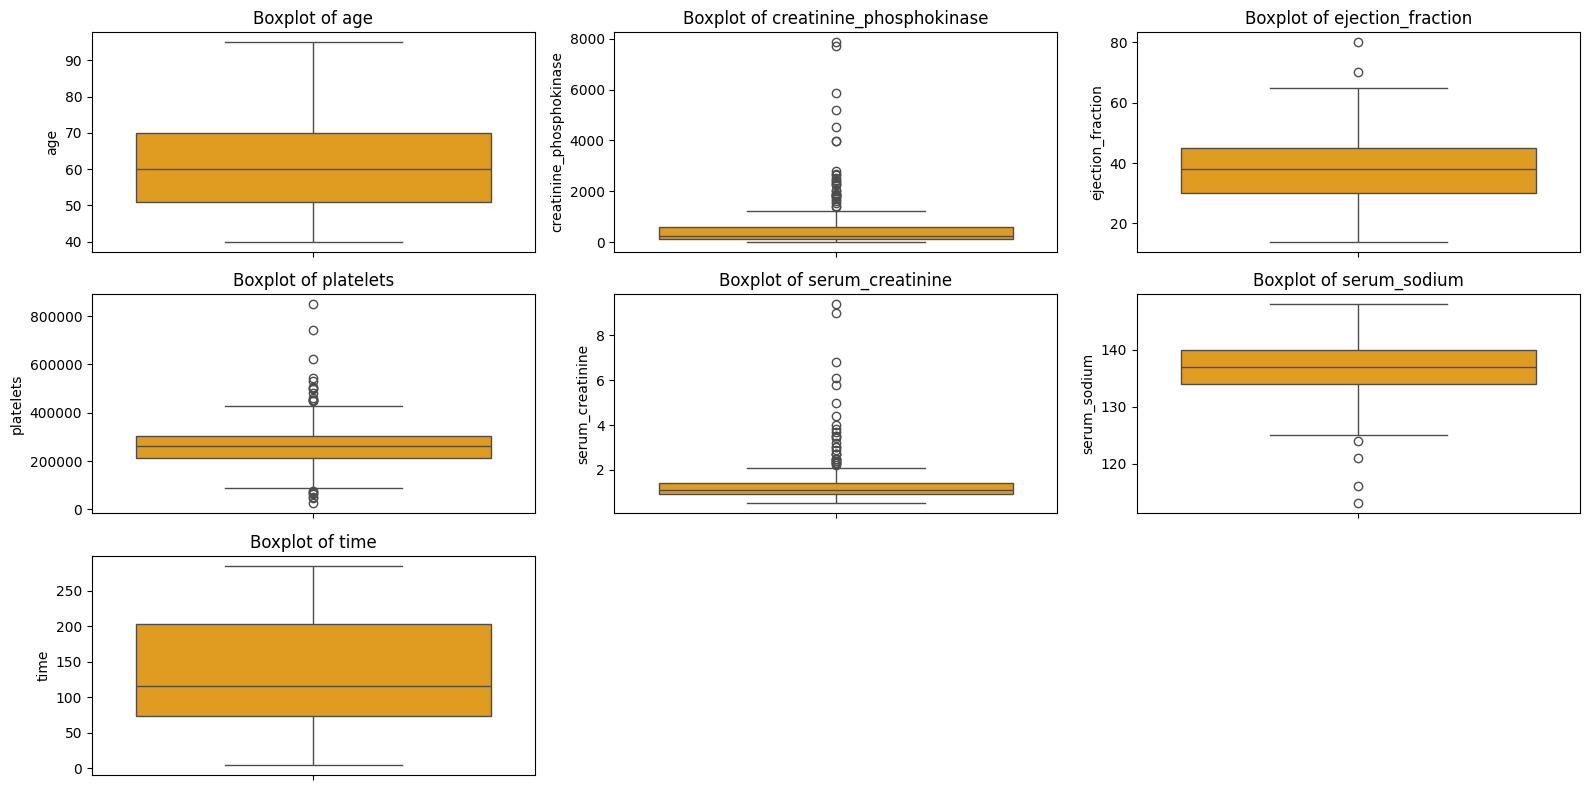

In [665]:
plt.figure(figsize=(16, 8))
for i, column in enumerate(numerical_vars, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column], color='orange')
    plt.title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()

Categorical Variable Analysis

In [666]:
categorical_analysis = {}

for column in categorical_vars:
    data = df[column]
    categorical_analysis[column] = {
        "Counts": data.value_counts().to_dict(),
        "Percentages": (data.value_counts(normalize=True) * 100).to_dict()
    }

categorical_analysis_df = pd.DataFrame(categorical_analysis)
display(categorical_analysis_df)

,anaemia,diabetes,high_blood_pressure,sex,smoking,death_event
Counts,"{0: 170, 1: 129}","{0: 174, 1: 125}","{0: 194, 1: 105}","{1: 194, 0: 105}","{0: 203, 1: 96}","{0: 203, 1: 96}"
Percentages,"{0: 56.85618729096989, 1: 43.1438127090301}","{0: 58.19397993311036, 1: 41.80602006688963}","{0: 64.88294314381271, 1: 35.11705685618729}","{1: 64.88294314381271, 0: 35.11705685618729}","{0: 67.89297658862876, 1: 32.10702341137124}","{0: 67.89297658862876, 1: 32.10702341137124}"


Visualization of Categorical Variables through Bar Plots

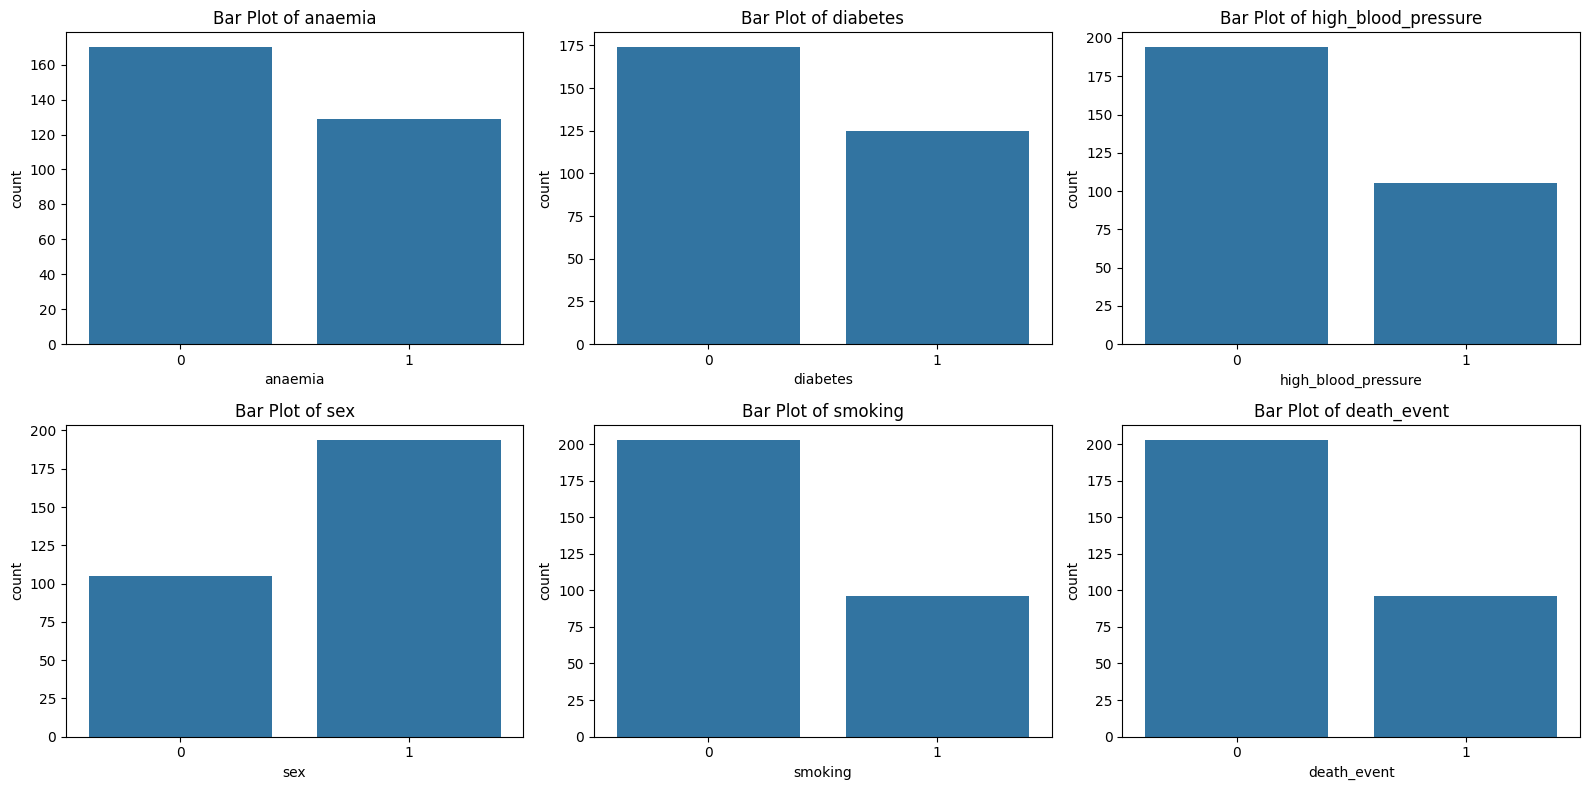

In [667]:
plt.figure(figsize=(16, 8))
for i, column in enumerate(categorical_vars, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=df[column])
    plt.title(f"Bar Plot of {column}")

plt.tight_layout()
plt.show()

## Bivariate Analysis

Categorical vs. Target Variable Association

In [668]:
categorical_associations = []
significance_level = 0.05
for i, cat_var in enumerate(categorical_vars):
    for tar_var in target_vars:
        contingency_table = pd.crosstab(df[cat_var], df[tar_var])
        chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
        chi2_stat = chi2_stat.round(2)
        categorical_associations.append({
            "Categorical Variable": cat_var,
            "Target Variable": tar_var,
            "Chi-Square Statistic": chi2_stat,
            "p-value": p_value,
            "Association": "Significant" if p_value < significance_level else "Not Significant"
        })

categorical_associations_df = pd.DataFrame(categorical_associations)
display(categorical_associations_df)

,Categorical Variable,Target Variable,Chi-Square Statistic,p-value,Association
0,anaemia,death_event,1.04,3.073161e-01,Not Significant
1,diabetes,death_event,0.00,1.000000e+00,Not Significant
2,high_blood_pressure,death_event,1.54,2.141034e-01,Not Significant
3,sex,death_event,0.00,1.000000e+00,Not Significant
4,smoking,death_event,0.01,9.317653e-01,Not Significant
5,death_event,death_event,294.43,5.386429e-66,Significant


No significant relationship found between categorical variables and target variable

Numerical Variables vs. Target Variable Association (Mann-Whitney Test)

In [669]:
group_comparisons = []
significance_level = 0.05
for num_var in numerical_vars:
    for tar_var in target_vars:
        group_0 = df[df[tar_var] == 0][num_var].dropna()
        group_1 = df[df[tar_var] == 1][num_var].dropna()
        mw_stat, mw_p = mannwhitneyu(group_0, group_1)
        group_comparisons.append({
            "Numerical Variable": num_var,
            "Target Variable": tar_var,
            "Mann-Whitney Test p-value": mw_p,
            "Relationship": "Significant" if mw_p < significance_level else "Not Significant"
        })

group_comparisons_df = pd.DataFrame(group_comparisons)
display(group_comparisons_df)

,Numerical Variable,Target Variable,Mann-Whitney Test p-value,Relationship
0,age,death_event,1.648395e-04,Significant
1,creatinine_phosphokinase,death_event,6.840400e-01,Not Significant
2,ejection_fraction,death_event,7.368249e-07,Significant
3,platelets,death_event,4.255585e-01,Not Significant
4,serum_creatinine,death_event,1.580998e-10,Significant
5,serum_sodium,death_event,2.927557e-04,Significant
6,time,death_event,6.852197e-21,Significant


Numerical Variables (age, ejection_fraction, serum_creatinine, serum_sodium and time) has a significant relationship with Target Variable (death_event)

Numerical Variables (creatinine_phosphokinase and platelets) has not have any significant relationship with Target Variable (death_event)

Since all categorical variables has not have any significant relationship with the target variable, so we only consider numerical variables (that has a significant relationship with the target variable) for predicting target variable

In [670]:
numerical_vars = ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']

Update the dataframe by keeping only numerical variables and target variable having significant relationship

In [671]:
columns_to_keep = numerical_vars + target_vars
df = df[columns_to_keep]
df.head()

,age,ejection_fraction,serum_creatinine,serum_sodium,time,death_event
0,75,20,1.9,130,4,1
1,55,38,1.1,136,6,1
2,65,20,1.3,129,7,1
3,50,20,1.9,137,7,1
4,65,20,2.7,116,8,1


## Multivariate Analysis

Reducing redundant data by analyzing correlations between variables

In [672]:
df.corr()

,age,ejection_fraction,serum_creatinine,serum_sodium,time,death_event
age,1.000000,0.060049,0.159161,-0.045992,-0.223969,0.253800
ejection_fraction,0.060049,1.000000,-0.011302,0.175902,0.041729,-0.268603
serum_creatinine,0.159161,-0.011302,1.000000,-0.189095,-0.149315,0.294278
serum_sodium,-0.045992,0.175902,-0.189095,1.000000,0.087640,-0.195204
time,-0.223969,0.041729,-0.149315,0.087640,1.000000,-0.526964
death_event,0.253800,-0.268603,0.294278,-0.195204,-0.526964,1.000000


<Axes: >

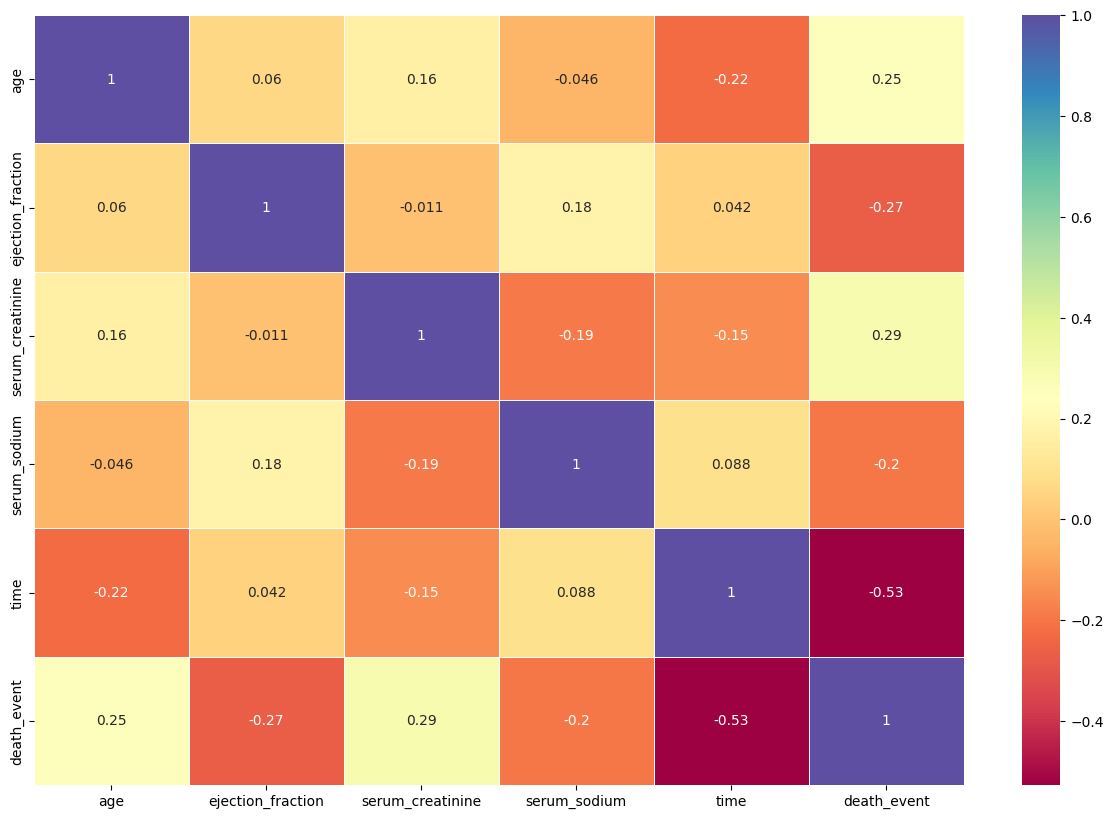

In [673]:
plt.figure(figsize = (15, 10))
sns.heatmap(data = df.corr(), cmap = "Spectral", annot = True, linewidths = 0.5)

No feature pairs show strong multicollinearity, meaning no need to drop any feature due to redundancy.

## Preparation for Modelling

Supervised Learning Approach

Splitting the dataset into features and target

In [674]:
X = df[numerical_vars]
y = df['death_event']
y = y.loc[X.index]  # Align target variable with feature rows

Splitting into training and testing sets

In [675]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Standardizing the features

In [676]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Classification Models

Logistic Regression

In [677]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)
log_reg_report = classification_report(y_test, y_pred_log, output_dict=True)
log_reg_roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])

In [678]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)
rf_roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test_scaled)[:, 1])

In [679]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
dt_report = classification_report(y_test, y_pred_dt, output_dict=True)
dt_roc_auc = roc_auc_score(y_test, dt.predict_proba(X_test_scaled)[:, 1])

### Classification Model Performance

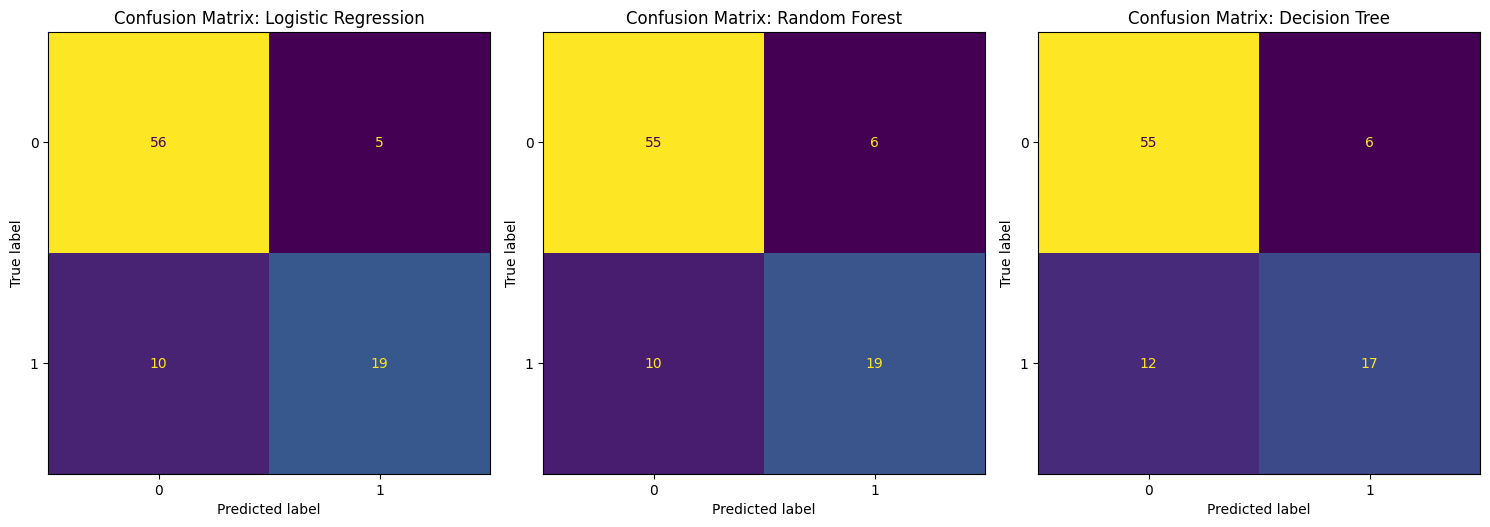

In [680]:
# Confusion Matrix for each model
models_dict = {
    "Logistic Regression": (y_test, log_reg.predict(X_test_scaled)),
    "Random Forest": (y_test, rf.predict(X_test_scaled)),
    "Decision Tree": (y_test, dt.predict(X_test_scaled))
}

# Plotting confusion matrices
plt.figure(figsize=(15, 5))
for i, (model_name, (true_values, predictions)) in enumerate(models_dict.items(), 1):
    plt.subplot(1, 3, i)
    ConfusionMatrixDisplay.from_predictions(true_values, predictions, ax=plt.gca(), colorbar=False)
    plt.title(f"Confusion Matrix: {model_name}")

plt.tight_layout()
plt.show()

In [681]:
display(pd.DataFrame({
        "Model": ["Logistic Regression", "Random Forest", "Decision Tree"],
        "Accuracy": [log_reg_report["accuracy"], rf_report["accuracy"], dt_report["accuracy"]],
        "ROC-AUC": [log_reg_roc_auc, rf_roc_auc, dt_roc_auc]
    }))

,Model,Accuracy,ROC-AUC
0,Logistic Regression,0.833333,0.881854
1,Random Forest,0.822222,0.876201
2,Decision Tree,0.800000,0.743923


Plotting Model Performance: Accuracy and ROC-AUC

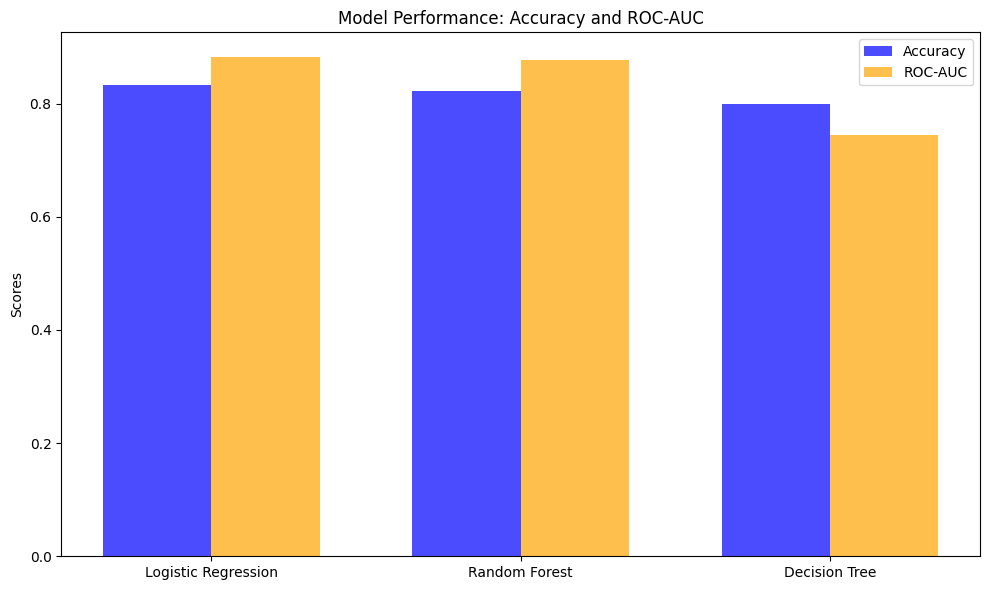

In [682]:
models = ["Logistic Regression", "Random Forest", "Decision Tree"]
accuracy_scores = [log_reg_report["accuracy"], rf_report["accuracy"], dt_report["accuracy"]]
roc_auc_scores = [log_reg_roc_auc, rf_roc_auc, dt_roc_auc]

plt.figure(figsize=(10, 6))
x = np.arange(len(models))
width = 0.35
plt.bar(x - width/2, accuracy_scores, width, label='Accuracy', color='blue', alpha=0.7)
plt.bar(x + width/2, roc_auc_scores, width, label='ROC-AUC', color='orange', alpha=0.7)
plt.xticks(x, models)
plt.ylabel("Scores")
plt.title("Model Performance: Accuracy and ROC-AUC")
plt.legend()
plt.tight_layout()
plt.show()


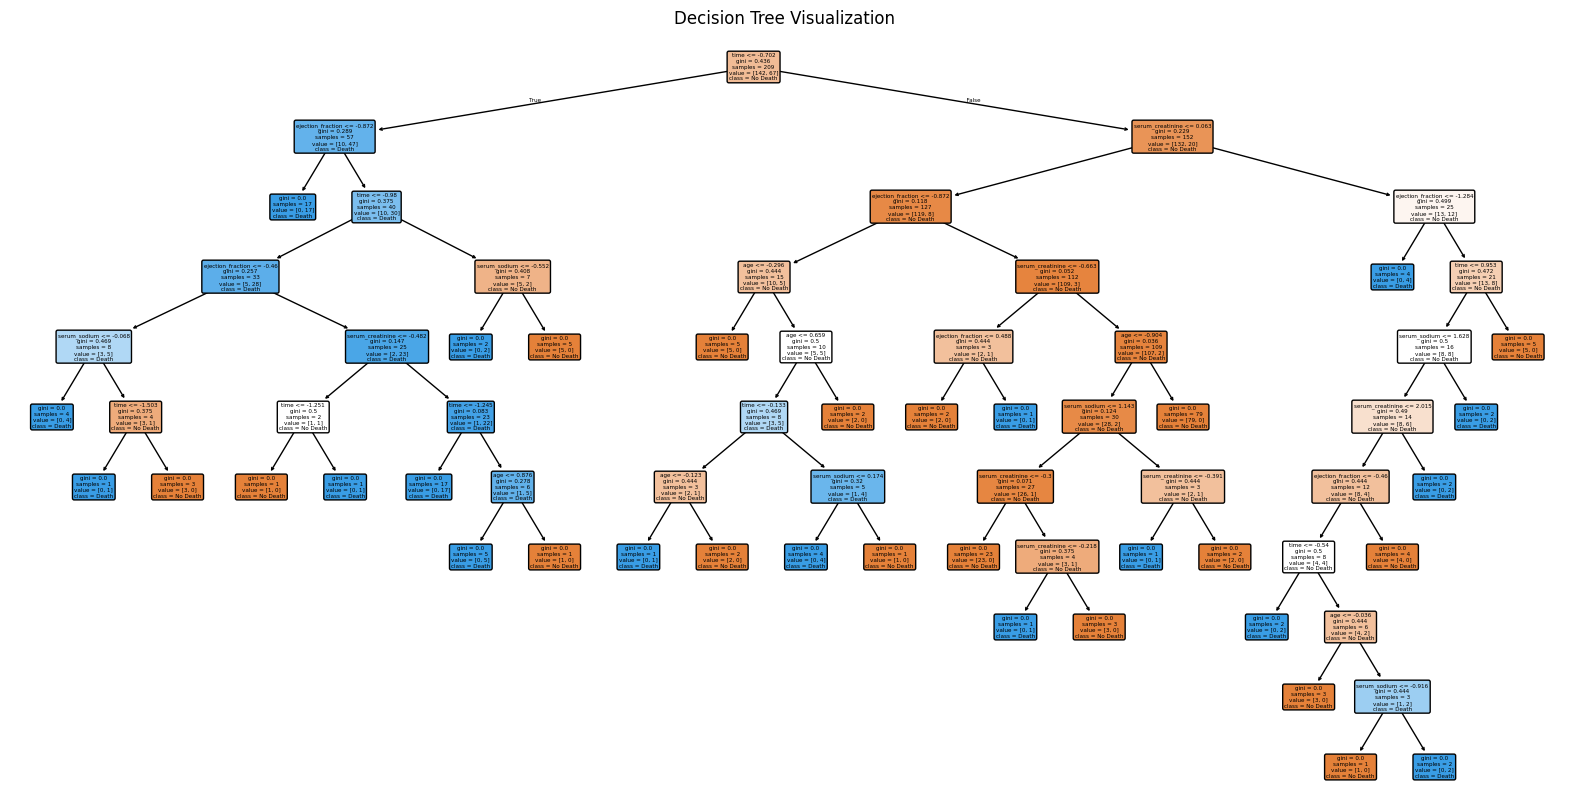

In [683]:
# **1. Visualizing Decision Tree**
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=numerical_vars, class_names=['No Death', 'Death'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

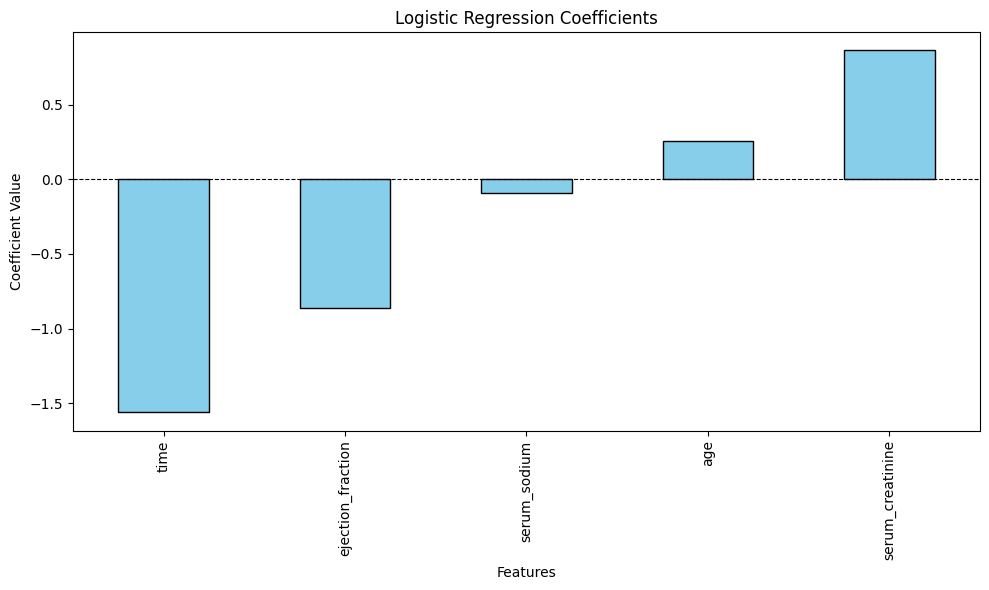

In [684]:
# **2. Visualizing Logistic Regression Coefficients**
plt.figure(figsize=(10, 6))
coefficients = pd.Series(log_reg.coef_[0], index=numerical_vars)
coefficients.sort_values().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Logistic Regression Coefficients")
plt.ylabel("Coefficient Value")
plt.xlabel("Features")
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.tight_layout()
plt.show()

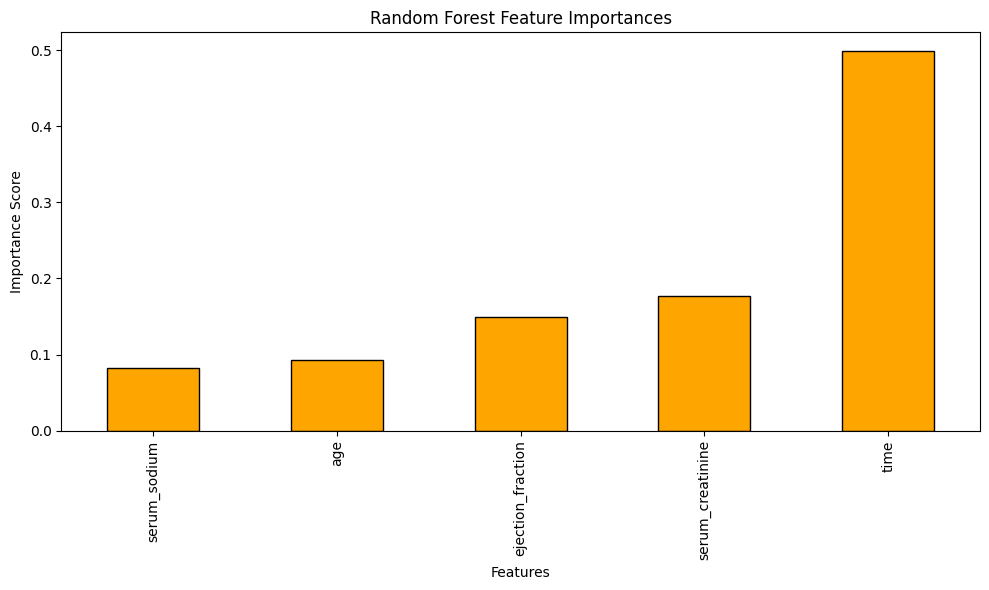

In [685]:
# **3. Visualizing Random Forest Feature Importances**
plt.figure(figsize=(10, 6))
feature_importances = pd.Series(rf.feature_importances_, index=numerical_vars)
feature_importances.sort_values().plot(kind='bar', color='orange', edgecolor='black')
plt.title("Random Forest Feature Importances")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.tight_layout()
plt.show()
